# Chess games analysis

This is a set of just over 20,000 games collected from a selection of users on the site Lichess.org, and how to collect more. I will also upload more games in the future as I collect them.

Here is the description of the variables
```
id: Unique identifier for each chess game.
rated: Indicates whether the game is rated or not (e.g., "True" for rated games).
created_at: Timestamp for when the game was created.
last_move_at: Timestamp for when the last move in the game was made.
turns: The total number of moves made in the game.
victory_status: Describes the status of the game's outcome (e.g., "mate," "resign," "draw," etc.).
winner: Indicates the winner of the game (e.g., "white," "black," or "draw").
increment_code: The time control increment code for the game.
white_id: Unique identifier for the white player in the game.
white_rating: The rating of the white player.
black_id: Unique identifier for the black player in the game.
black_rating: The rating of the black player.
moves: A list of moves made in the game, typically in algebraic notation.
opening_eco: The opening's classification code (e.g., "A00" to "E99") based on the Encyclopedia of Chess Openings (ECO).
opening_name: The name of the chess opening used in the game.
opening_ply: The number of half-moves (plies) played in the opening phase of the game.
rating_change: The difference between white piece player and black piece player
```


For each of these separate games from Lichess. I collected this data using the Lichess API, which enables collection of any given users game history. The difficult part was collecting usernames to use, however the API also enables dumping of all users in a Lichess team. There are several teams on Lichess with over 1,500 players, so this proved an effective way to get users to collect games from.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('games.csv')

## Deep look into data

In [4]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


## Check if there is any null value

In [6]:
df[df.isnull().any(axis=1)]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply


In [9]:
df.describe(include='all')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
count,20058,20058,2.005800e+04,2.005800e+04,20058.000000,20058,20058,20058,20058,20058.000000,20058,20058.000000,20058,20058,20058,20058.000000
unique,19113,2,NaN,NaN,NaN,4,3,400,9438,NaN,9331,NaN,18920,365,1477,NaN
top,XRuQPSzH,True,NaN,NaN,NaN,resign,white,10+0,taranga,NaN,taranga,NaN,e4 e5,A00,Van't Kruijs Opening,NaN
freq,5,16155,NaN,NaN,NaN,11147,10001,7721,72,NaN,82,NaN,27,1007,368,NaN
mean,NaN,NaN,1.483617e+12,1.483618e+12,60.465999,NaN,NaN,NaN,NaN,1596.631868,NaN,1588.831987,NaN,NaN,NaN,4.816981
std,NaN,NaN,2.850151e+10,2.850140e+10,33.570585,NaN,NaN,NaN,NaN,291.253376,NaN,291.036126,NaN,NaN,NaN,2.797152
min,NaN,NaN,1.376772e+12,1.376772e+12,1.000000,NaN,NaN,NaN,NaN,784.000000,NaN,789.000000,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.477548e+12,1.477548e+12,37.000000,NaN,NaN,NaN,NaN,1398.000000,NaN,1391.000000,NaN,NaN,NaN,3.000000
50%,NaN,NaN,1.496010e+12,1.496010e+12,55.000000,NaN,NaN,NaN,NaN,1567.000000,NaN,1562.000000,NaN,NaN,NaN,4.000000
75%,NaN,NaN,1.503170e+12,1.503170e+12,79.000000,NaN,NaN,NaN,NaN,1793.000000,NaN,1784.000000,NaN,NaN,NaN,6.000000


In [11]:
df.shape

(20058, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


With all of this we can see that all variables have 20058 non-null observations. Matches with the shape of the dataset (20058, 16). So we can say that dataset does not have any null value

### What is the most winnable color of pieces?

In [19]:
df.winner.value_counts(normalize=True)

white    0.498604
black    0.454033
draw     0.047363
Name: winner, dtype: float64

In [61]:
df.winner.value_counts()

white    10001
black     9107
draw       950
Name: winner, dtype: int64

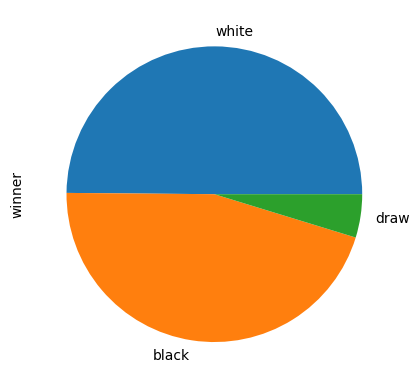

In [29]:
df.winner.value_counts().plot.pie()
plt.show()

There is not a huge difference, but white color pieces (49.86%) win more than black color pieces (45.40%) for %4.46. Draws correspond to 4.73%

## What is the most common way to win?

In [23]:
df.victory_status.unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [31]:
df.victory_status.value_counts(normalize=True)

resign       0.555738
mate         0.315336
outoftime    0.083757
draw         0.045169
Name: victory_status, dtype: float64

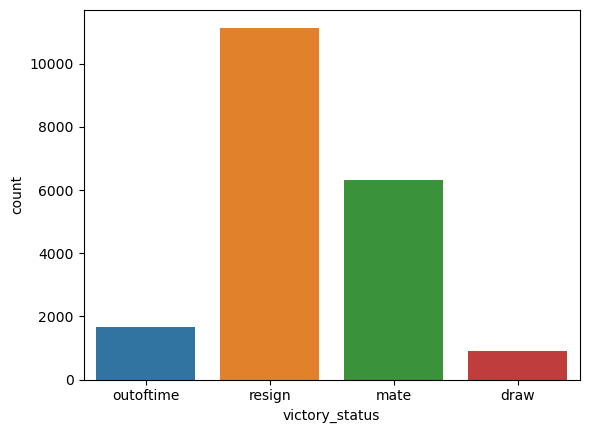

In [30]:
sns.countplot(x='victory_status', data=df)
plt.show()
plt.close()

In this plot we can see that the most common way to win is **resign** (55.57%), followed by **mate** (31.53%). Then **outoftime** (8.37%), and lastly **draw** (4.51%). This, in numbers is:

In [33]:
df.victory_status.value_counts()

resign       11147
mate          6325
outoftime     1680
draw           906
Name: victory_status, dtype: int64

## What is the most common win oppening strategy for white and black pieces?

In [261]:
dfwhite = df[df.winner == 'white']
dfblack = df[df.winner == 'black']

### White

In [195]:
len(dfwhite.opening_name)

10001

In [158]:
dfwhite.opening_name.value_counts().head(10)

Scandinavian Defense: Mieses-Kotroc Variation    164
Sicilian Defense                                 149
Scotch Game                                      145
French Defense: Knight Variation                 135
Philidor Defense #3                              127
Van't Kruijs Opening                             126
Sicilian Defense: Bowdler Attack                 119
Queen's Pawn Game: Mason Attack                  116
Queen's Pawn Game: Chigorin Variation            112
Horwitz Defense                                  110
Name: opening_name, dtype: int64

In [166]:
dfgraphwhite = dfwhite[dfwhite.opening_name.isin(['Scandinavian Defense: Mieses-Kotroc Variation',\
                                                  'Sicilian Defense', \
                                                 'Scotch Game', \
                                                 'French Defense: Knight Variation', \
                                                 'Philidor Defense #3', \
                                                 "Van't Kruijs Opening", \
                                                 'Sicilian Defense: Bowdler Attack', \
                                                 "Queen's Pawn Game: Mason Attack", \
                                                 "Queen's Pawn Game: Chigorin Variation", \
                                                 'Horwitz Defense'])]

In [172]:
dfgraphwhite.opening_name.unique()

array(['Scandinavian Defense: Mieses-Kotroc Variation',
       "Van't Kruijs Opening", 'Horwitz Defense',
       'Sicilian Defense: Bowdler Attack',
       "Queen's Pawn Game: Chigorin Variation", 'Sicilian Defense',
       "Queen's Pawn Game: Mason Attack", 'Scotch Game',
       'French Defense: Knight Variation', 'Philidor Defense #3'],
      dtype=object)

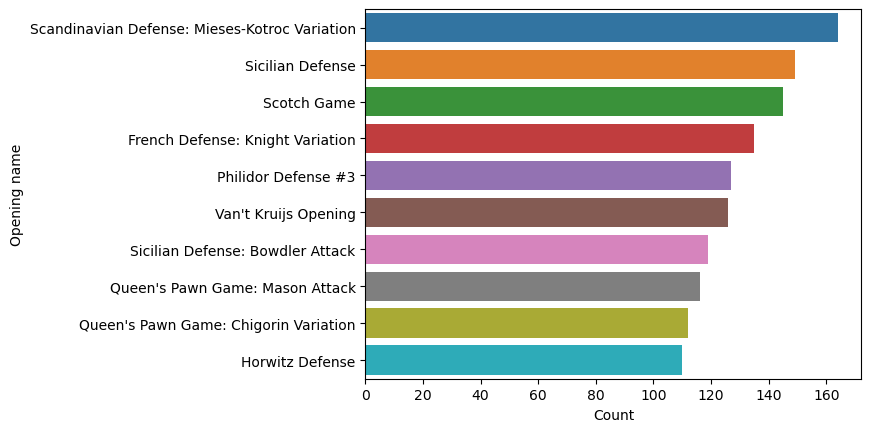

In [192]:
sns.countplot(y='opening_name', \
              data = dfgraphwhite, \
              orient='h', \
              order=dfgraphwhite['opening_name'].value_counts().index)
plt.ylabel('Opening name')
plt.xlabel('Count')
plt.show()

In [193]:
dfwhite.opening_name.value_counts(normalize=True)

Scandinavian Defense: Mieses-Kotroc Variation                        0.016398
Sicilian Defense                                                     0.014899
Scotch Game                                                          0.014499
French Defense: Knight Variation                                     0.013499
Philidor Defense #3                                                  0.012699
                                                                       ...   
King's Gambit Accepted |  Bishop's Gambit |  Bogoljubov Variation    0.000100
Ruy Lopez: Noah's Ark Trap                                           0.000100
Ruy Lopez: Closed Variations |  Martinez Variation                   0.000100
Italian Game: Scotch Gambit |  de Riviere Defense                    0.000100
Lion Defense: Anti-Philidor |  Lion's Cave                           0.000100
Name: opening_name, Length: 1181, dtype: float64

For the graph, we used an auxiliar dataframe. For that auxiliar dataframe (dfgraphwhite) we just added the top 10 most common **Opening Names**. For percentage, we used a table that hold all opening names. As we can see, **Scandinavian Defense: Mieses-Kotroc Variation** is the most common way to open a winning match with white pieces (1.63% out of 10001 games)

### Black

In [196]:
len(dfblack.opening_name)

9107

In [197]:
dfblack.opening_name.value_counts().head(10)

Van't Kruijs Opening                     226
Sicilian Defense                         194
Sicilian Defense: Bowdler Attack         164
Scandinavian Defense                     123
French Defense: Knight Variation         121
Scotch Game                              115
Queen's Pawn Game: Chigorin Variation    109
Queen's Pawn Game: Mason Attack          103
Indian Game                              100
Philidor Defense #2                       96
Name: opening_name, dtype: int64

In [199]:
dfgraphblack = dfblack[dfblack.isin(["Van't Kruijs Opening", \
                                    'Sicilian Defense', \
                                    'Sicilian Defense: Bowdler Attack', \
                                    'Scandinavian Defense', \
                                    'French Defense: Knight Variation', \
                                    'Scotch Game', \
                                    "Queen's Pawn Game: Chigorin Variation", \
                                    "Queen's Pawn Game: Mason Attack", \
                                    'Indian Game', \
                                    'Philidor Defense #2'])]

In [200]:
dfgraphblack.opening_name.unique()

array([nan, 'French Defense: Knight Variation',
       "Queen's Pawn Game: Chigorin Variation", 'Indian Game',
       'Scandinavian Defense', 'Scotch Game',
       "Queen's Pawn Game: Mason Attack", 'Sicilian Defense',
       'Philidor Defense #2', "Van't Kruijs Opening",
       'Sicilian Defense: Bowdler Attack'], dtype=object)

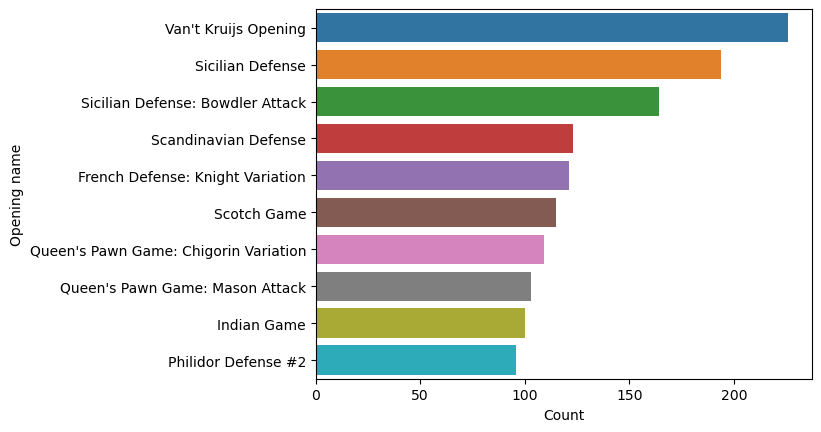

In [201]:
sns.countplot(y='opening_name', \
              data = dfgraphblack, \
              orient='h', \
              order=dfgraphblack['opening_name'].value_counts().index)
plt.ylabel('Opening name')
plt.xlabel('Count')
plt.show()

In [202]:
dfblack.opening_name.value_counts(normalize=True)

Van't Kruijs Opening                                               0.024816
Sicilian Defense                                                   0.021302
Sicilian Defense: Bowdler Attack                                   0.018008
Scandinavian Defense                                               0.013506
French Defense: Knight Variation                                   0.013286
                                                                     ...   
Ruy Lopez: Closed Variations |  Yates Variation |  Short Attack    0.000110
Queen's Gambit Accepted: Showalter Variation                       0.000110
King's Gambit Accepted |  Greco Gambit                             0.000110
Van Geet Opening: Dunst-Perrenet Gambit                            0.000110
Pirc Defense: Austrian Attack |  Dragon Formation                  0.000110
Name: opening_name, Length: 1145, dtype: float64

For black pieces we can see that the most common win strategy is **Van't Kruijs Opening**, having %2.48 of the total black piece wins (9107)

## Are most of the games rated?

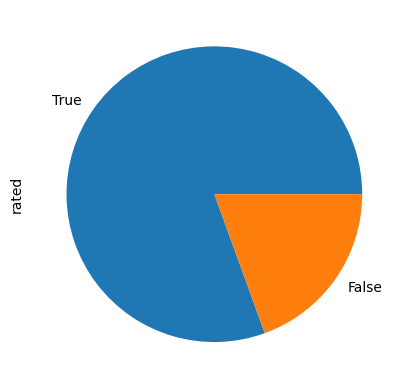

In [209]:
df.rated.value_counts().plot.pie()
plt.show()
plt.close()

We can affirm that most of the games are rated

## What is the mean of turns that take to a white or black piece to win a game?

### White

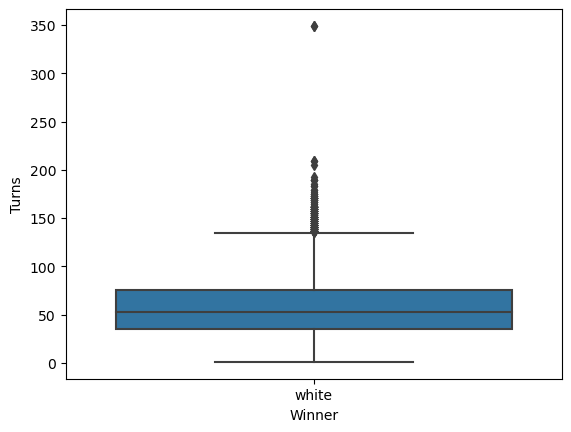

In [220]:
sns.boxplot(data = dfwhite, x='winner', y='turns')
plt.xlabel('Winner')
plt.ylabel('Turns')
plt.show()
plt.close()

In [226]:
round(dfwhite.turns.mean())

58

We can see that the mean turns to win a game as a white piece is 58

We can also see that there are a lot of values that go out of the chart. So, for better visualization, we are going to use the interquantile range

In [217]:
Q1 = dfwhite['turns'].quantile(0.25)
Q3 = dfwhite['turns'].quantile(0.75)
IQR = Q3 - Q1

In [222]:
dfwhiteinterquantile = dfwhite[dfwhite['turns'].between(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)]

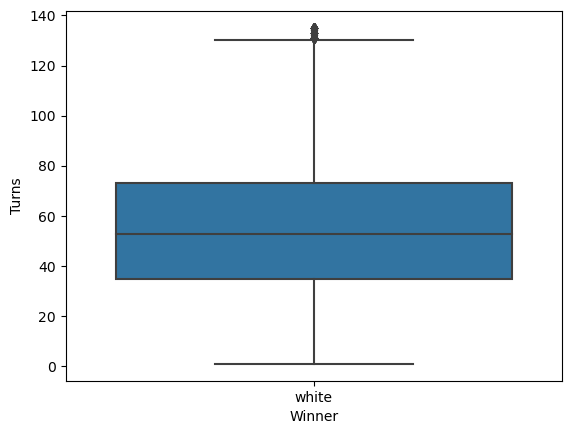

In [223]:
sns.boxplot(data = dfwhiteinterquantile, x='winner', y='turns')
plt.xlabel('Winner')
plt.ylabel('Turns')
plt.show()
plt.close()

### Black

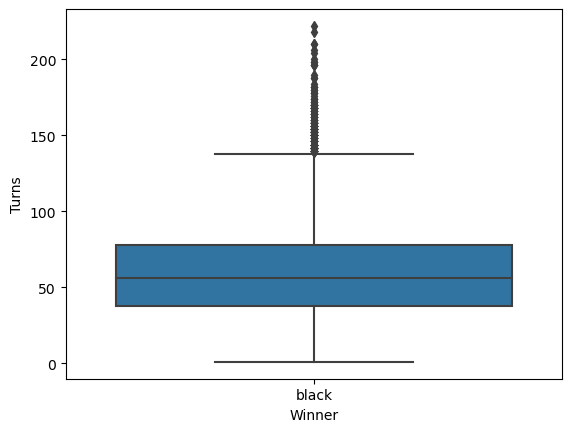

In [227]:
sns.boxplot(data = dfblack, x='winner', y='turns')
plt.xlabel('Winner')
plt.ylabel('Turns')
plt.show()
plt.close()

In [228]:
round(dfblack.turns.mean())

61

As we can see, black pieces, as a mean, take 61 turns to win a game. Now, to better visualize this one as well, we are going to use the interquantile range.

In [229]:
Q1_1 = dfblack['turns'].quantile(0.25)
Q3_1 = dfblack['turns'].quantile(0.75)
IQR = Q3_1 - Q1_1

In [230]:
dfblackinterquantile = dfblack[dfblack['turns'].between(Q1_1 - 1.5 * IQR, Q3_1 + 1.5 * IQR)]

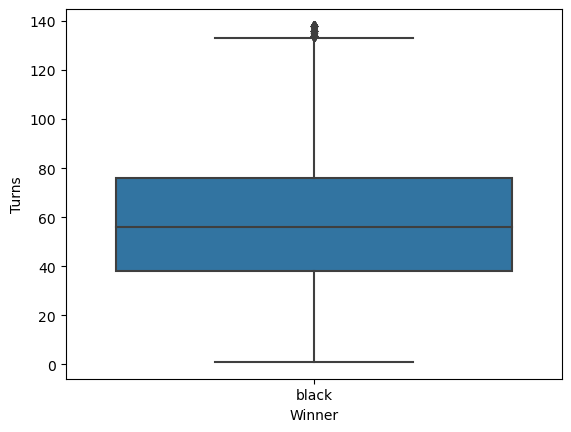

In [231]:
sns.boxplot(data = dfblackinterquantile, x='winner', y='turns')
plt.xlabel('Winner')
plt.ylabel('Turns')
plt.show()
plt.close()

## Rating difference related to wins

In [242]:
dfwhiterating = dfwhite
dfblackrating = dfblack

In [250]:
dfblackrating.rating_change.mean()

-88.98111342923026

In [251]:
dfwhiterating.rating_change.mean()

95.30746925307469

With this we can see that, when white pieces win, the rating of the players, as a mean, is 95.30 positive to white. In the other hand, when black pieces win, the rating is 88.98 positive to black rating pieces

## Which is the most winning black id and white id

### White

In [264]:
dfwhite.white_id.value_counts().head(10)

taranga               34
ssf7                  29
hassan1365416         28
a_p_t_e_m_u_u         25
vladimir-kramnik-1    22
1240100948            22
lance5500             21
traced                21
ozil17                21
ozguragarr            21
Name: white_id, dtype: int64

In [269]:
dfwinningwhiteid = dfwhite[dfwhite.white_id.isin(['taranga', \
                         'ssf7', \
                         'hassan1365416', \
                         'a_p_t_e_m_u_u', \
                         'vladimir-kramnik-1', \
                         '1240100948', \
                         'lance5500', \
                         'traced', \
                         'ozil17', \
                         'ozguragarr'])]

In [271]:
dfwinningwhiteid.white_id.unique()

array(['taranga', 'lance5500', 'a_p_t_e_m_u_u', 'traced', 'hassan1365416',
       'ozguragarr', '1240100948', 'vladimir-kramnik-1', 'ozil17', 'ssf7'],
      dtype=object)

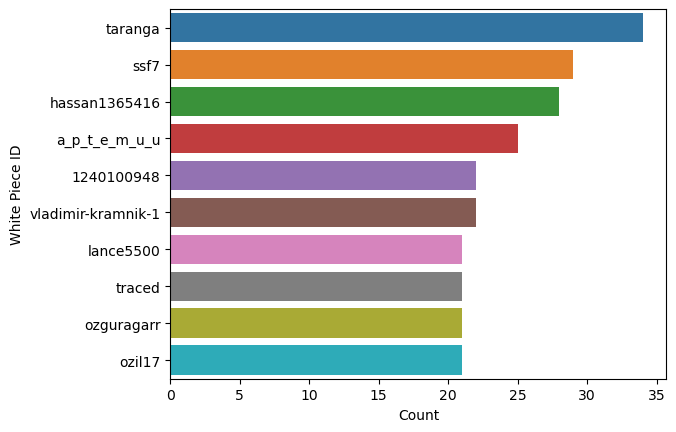

In [272]:
sns.countplot(y='white_id', \
              data = dfwinningwhiteid, \
              orient='h', \
              order=dfwinningwhiteid['white_id'].value_counts().index)
plt.ylabel('White Piece ID')
plt.xlabel('Count')
plt.show()

In [273]:
dfwhite.white_id.value_counts(normalize=True).head(10)

taranga               0.0034
ssf7                  0.0029
hassan1365416         0.0028
a_p_t_e_m_u_u         0.0025
vladimir-kramnik-1    0.0022
1240100948            0.0022
lance5500             0.0021
traced                0.0021
ozil17                0.0021
ozguragarr            0.0021
Name: white_id, dtype: float64

For white pieces, we have that the most winning id is **taranga**. This id won 34 games, representing 0.34% of the total of games

### Black

In [274]:
dfblack.black_id.value_counts().head(10)

taranga               38
ducksandcats          29
vladimir-kramnik-1    28
chesscarl             27
docboss               25
king5891              22
smilsydov             21
a_p_t_e_m_u_u         21
doraemon61            20
saviter               18
Name: black_id, dtype: int64

In [279]:
dfwinningblackid = dfblack[dfblack.black_id.isin(['taranga', \
                         'ducksandcats', \
                         'vladimir-kramnik-1', \
                         'chesscarl', \
                         'docboss', \
                         'king5891', \
                         'smilsydov', \
                         'a_p_t_e_m_u_u', \
                         'doraemon61', \
                         'saviter'])]

In [280]:
dfwinningblackid.black_id.unique()

array(['taranga', 'chesscarl', 'saviter', 'ducksandcats', 'a_p_t_e_m_u_u',
       'doraemon61', 'king5891', 'vladimir-kramnik-1', 'docboss',
       'smilsydov'], dtype=object)

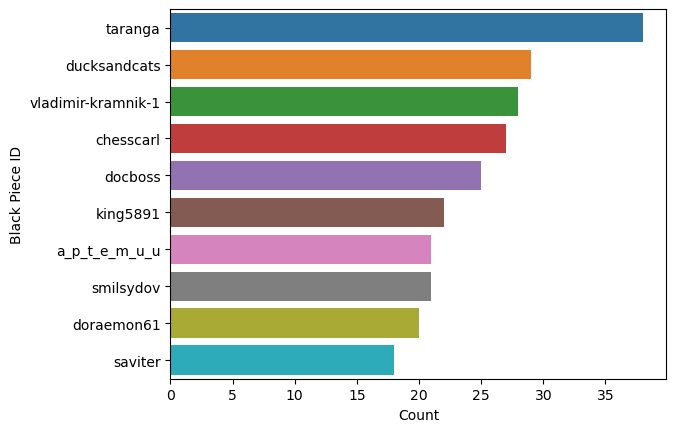

In [281]:
sns.countplot(y='black_id', \
              data = dfwinningblackid, \
              orient='h', \
              order=dfwinningblackid['black_id'].value_counts().index)
plt.ylabel('Black Piece ID')
plt.xlabel('Count')
plt.show()

In [282]:
dfblack.black_id.value_counts(normalize=True).head(10)

taranga               0.004173
ducksandcats          0.003184
vladimir-kramnik-1    0.003075
chesscarl             0.002965
docboss               0.002745
king5891              0.002416
smilsydov             0.002306
a_p_t_e_m_u_u         0.002306
doraemon61            0.002196
saviter               0.001977
Name: black_id, dtype: float64

For black pieces, we can see that **taranga** is also the more winning player, with 38 games. This represent 0.41% of the total games

## Is there a relation between rating difference and the number of turns to win a game?

Text(0.5, 1.0, 'Relation between Rating Change and Turns')

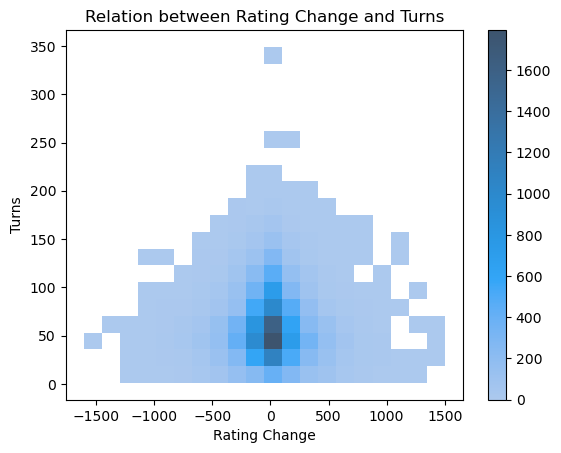

In [308]:
sns.histplot(data=df, x='rating_change', y='turns', bins=20, cbar=True)
plt.xlabel('Rating Change')
plt.ylabel('Turns')
plt.title('Relation between Rating Change and Turns')

We can see in the graph that most of the games have two things in common:
```
Rating change is small
Turns are lower than 50
```
We can also say:
```
High rating difference games are very short
High turns games have small rating difference
```

## What is the most winning Opening Eco

In [312]:
df.opening_eco.value_counts().head(10)

A00    1007
C00     844
D00     739
B01     716
C41     691
C20     675
A40     618
B00     611
B20     567
C50     538
Name: opening_eco, dtype: int64

In [314]:
dfopeningeco = df[df.opening_eco.isin(['A00', 'C00', 'D00', 'B01', 'C41', 'C20', 'A40', 'B00', 'B20', 'C50'])]

In [316]:
dfopeningeco.opening_eco.unique()

array(['B00', 'C20', 'C41', 'D00', 'C50', 'B01', 'A00', 'C00', 'A40',
       'B20'], dtype=object)

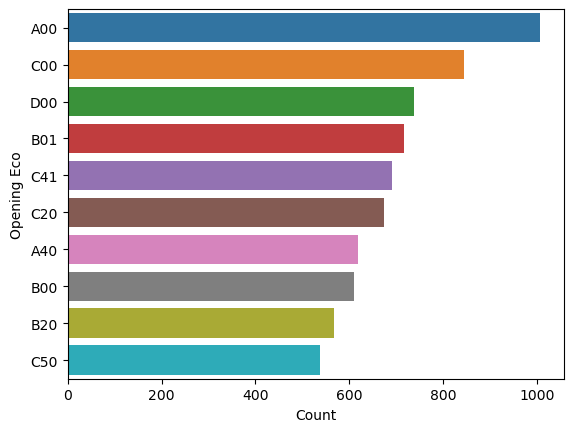

In [317]:
sns.countplot(y='opening_eco', \
              data = dfopeningeco, \
              orient='h', \
              order=dfopeningeco['opening_eco'].value_counts().index)
plt.ylabel('Opening Eco')
plt.xlabel('Count')
plt.show()

In [319]:
df.opening_eco.value_counts(normalize=True)

A00    0.050204
C00    0.042078
D00    0.036843
B01    0.035696
C41    0.034450
         ...   
A33    0.000050
D22    0.000050
E44    0.000050
B58    0.000050
D19    0.000050
Name: opening_eco, Length: 365, dtype: float64

As the plot shows, **A00** is the most winning **Opening Eco**, with 1007 games, representing 5.02% of the total count. 